In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Construction_Data_PM_Forms_All_Projects.csv'
data = pd.read_csv(file_path)
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/Construction_Data_PM_Forms_All_Projects.csv'

This loads your CSV file into a Pandas DataFrame and displays the first few rows to give you an overview of the data.

In [ ]:

print("Dataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())
print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ref                  10254 non-null  object
 1   Status               10254 non-null  object
 2   Location             10254 non-null  object
 3   Name                 10254 non-null  object
 4   Created              10254 non-null  object
 5   Type                 10254 non-null  object
 6   Status Changed       10254 non-null  object
 7   Open Actions         10254 non-null  int64 
 8   Total Actions        10254 non-null  int64 
 9   Association          2098 non-null   object
 10  OverDue              10254 non-null  bool  
 11  Images               10254 non-null  bool  
 12  Comments             10254 non-null  bool  
 13  Documents            9450 non-null   object
 14  Project              10254 non-null  int64 
 15  Report Forms Status  10252 non-null  ob

data.info(): Shows the number of rows, columns, and data types.
data.isnull().sum(): Identifies missing values in each column.
data.describe(): Provides summary statistics (mean, min, max, etc.) for numerical columns.


In [ ]:

numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# to reduce error by the missing values
for column in data.select_dtypes(include='object').columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
print(data.isnull().sum())

NameError: name 'data' is not defined

Numerical columns are filled with their mean.
Categorical columns are filled with their mode.
Missing values are checked again to ensure they’re handled.


In [ ]:
if 'Planned_Start_Date' in data.columns and 'Actual_Start_Date' in data.columns:
    data['Planned_Start_Date'] = pd.to_datetime(data['Planned_Start_Date'])
    data['Actual_Start_Date'] = pd.to_datetime(data['Actual_Start_Date'])

    data['Delay_Days'] = (data['Actual_Start_Date'] - data['Planned_Start_Date']).dt.days

    #it helps to make the analysis more relavent to the problem ( eg: tracking delays or resources effieciency)

if 'Resources_Allocated' in data.columns and 'Budget' in data.columns:
    data['Resource_Utilization'] = (data['Resources_Allocated'] / data['Budget']) * 100

print(data.head())

         Ref                Status  \
0  F145185.4                Opened   
1  F1.495500  Open / Ongoing Works   
2  F1.495499  Open / Ongoing Works   
3  F1.495498  Open / Ongoing Works   
4  F1.495496  Open / Ongoing Works   

                                            Location  \
0  01 Daily Site Diary>Site Management>JPC Projec...   
1  02 Daily Work Plan>Site Management>JPC Project...   
2  02 Daily Work Plan>Site Management>JPC Project...   
3  02 Daily Work Plan>Site Management>JPC Project...   
4  02 Daily Work Plan>Site Management>JPC Project...   

                             Name     Created                       Type  \
0   1328 CM-SM-FRM-001 Site Diary  15/09/2020            Site Management   
1  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
2  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
3  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
4  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcont

Converts date columns to datetime format for easier manipulation.
Creates a new column Delay_Days to measure delays.
Creates a new column Resource_Utilization to measure resource efficiency (if applicable).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Progress Percentage (if applicable)
if 'Progress_Percentage' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Progress_Percentage'], kde=True)
    plt.title('Progress Percentage Distribution')
    plt.xlabel('Progress Percentage')
    plt.ylabel('Frequency')
    plt.show()

# Plot Delay Days (if applicable)
if 'Delay_Days' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Delay_Days'])
    plt.title('Delay Days Distribution')
    plt.xlabel('Delay Days')
    plt.show()

A histogram shows the distribution of progress percentages (if applicable).
A boxplot highlights the range and outliers in delay days (if applicable).

In [ ]:
if 'Planned_Start_Date' in data.columns and 'Delay_Days' in data.columns:
    data.dropna(subset=['Planned_Start_Date', 'Delay_Days'], inplace=True)

    data['Planned_Start_Date'] = pd.to_datetime(data['Planned_Start_Date'])
    data['Delay_Days'] = pd.to_numeric(data['Delay_Days'], errors='coerce')

    data_sorted = data.sort_values(by='Planned_Start_Date')

    plt.figure(figsize=(12, 6))
    plt.plot(data_sorted['Planned_Start_Date'], data_sorted['Delay_Days'], marker='o', linestyle='-', color='orange')
    plt.title('Delay Days Over Time')
    plt.xlabel('Planned Start Date')
    plt.ylabel('Delay Days')
    plt.grid(True)
    plt.show()

else:
    print("One or both columns ('Planned_Start_Date', 'Delay_Days') are missing in the dataset.")

One or both columns ('Planned_Start_Date', 'Delay_Days') are missing in the dataset.


In [ ]:
# Check if 'Budget' and 'Progress_Percentage' columns exist
if 'Budget' in data.columns and 'Progress_Percentage' in data.columns:
    # Plot a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Budget', y='Progress_Percentage', data=data, hue='Project_ID', palette='Set2')
    plt.title('Budget vs. Progress Percentage')
    plt.xlabel('Budget')
    plt.ylabel('Progress Percentage (%)')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
    plt.show()

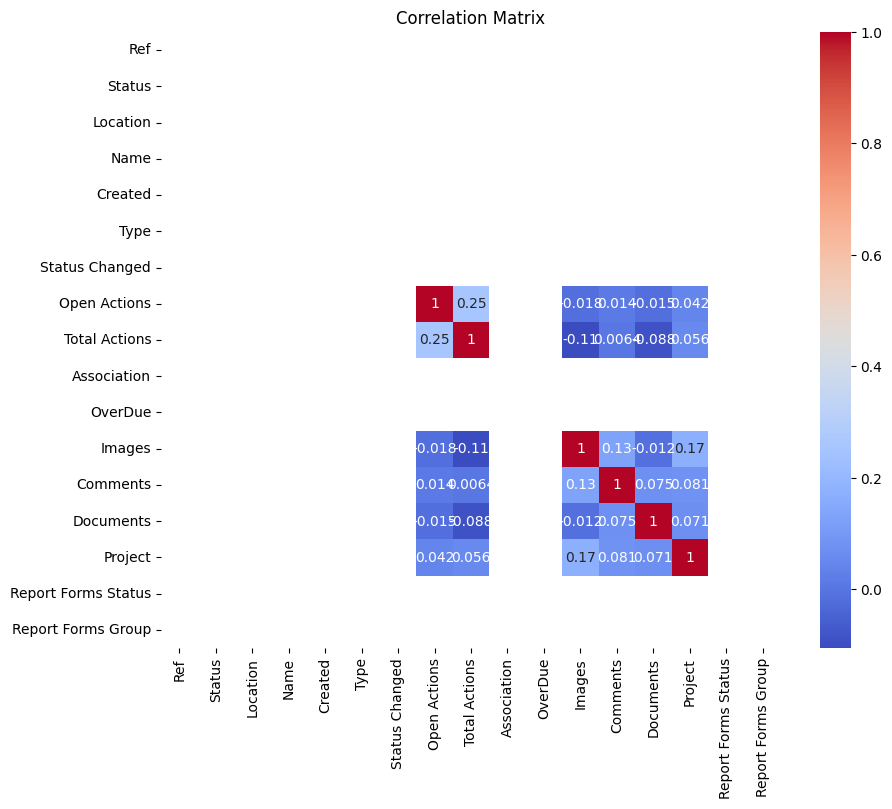

In [ ]:
# Correlation matrix to identify relationships between numerical columns
for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Please check its contents.")

      #it helps to visulize like relationship between the budget and the pregress, this guides feature selection foe ml models

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

if 'Project_ID' in data.columns and 'Progress_Percentage' in data.columns:
    average_progress = data.groupby('Project_ID')['Progress_Percentage'].mean()
    print("\nAverage Progress Percentage by Project:")
    print(average_progress)

A correlation matrix identifies relationships between numerical features.
Groupby calculates the average progress percentage for each project (if applicable).


Available categorical columns: ['project_type', 'milestone_name', 'status']

Column: project_type
Unique Values: ['Type A' 'Type B' None 'Type C']
Number of NaN values: 1

Column: milestone_name
Unique Values: ['M1' 'M2' 'M3']
Number of NaN values: 0

Column: status
Unique Values: ['Completed' 'In Progress' None]
Number of NaN values: 1


<ipython-input-33-0b8da9154c29>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-33-0b8da9154c29>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-33-0b8da9154c29>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


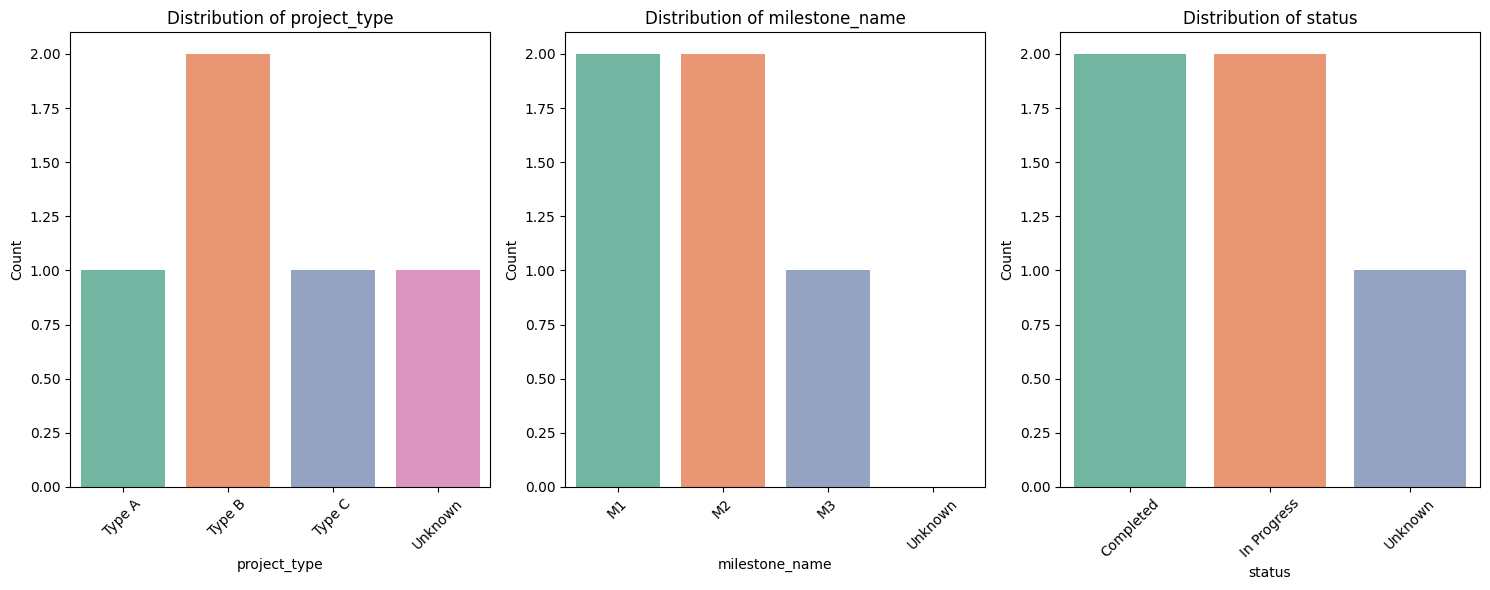

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your actual data loading logic)
# Uncomment the line below if you're reading from a CSV file
# data = pd.read_csv('your_file.csv')

# Example: Replace this with your actual DataFrame
data = pd.DataFrame({
    'Project_Type': ['Type A', 'Type B', None, 'Type C', 'Type B'],
    'Milestone_Name': ['M1', 'M2', 'M1', 'M3', 'M2'],
    'Status': ['Completed', 'In Progress', 'Completed', None, 'In Progress']
})

# Step 1: Normalize column names (strip spaces and convert to lowercase)
data.columns = data.columns.str.strip().str.lower()

# Define categorical columns (ensure these match the normalized column names)
categorical_columns = ['project_type', 'milestone_name', 'status']

# Step 2: Filter available categorical columns
available_categorical_columns = [col for col in categorical_columns if col in data.columns]

if available_categorical_columns:
    print(f"Available categorical columns: {available_categorical_columns}")

    # Step 3: Check unique values and handle missing data
    for col in available_categorical_columns:
        print(f"\nColumn: {col}")
        print(f"Unique Values: {data[col].unique()}")
        print(f"Number of NaN values: {data[col].isnull().sum()}")

        # Convert column to categorical type
        data[col] = data[col].astype('category')

        # Fill missing values with "Unknown" (optional, you can drop them instead)
        data[col] = data[col].cat.add_categories("Unknown").fillna("Unknown")

    # Step 4: Plotting
    plt.figure(figsize=(15, 6))

    for i, col in enumerate(available_categorical_columns, 1):
        plt.subplot(1, len(available_categorical_columns), i)

        # Check if the column has any non-null values
        if data[col].notnull().any():
            sns.countplot(data=data, x=col, palette='Set2')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
        else:
            print(f"No non-null values found in column: {col}")

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns available for distribution analysis.")

Shows the frequency of each category in categorical columns like Project_Type, Milestone_Name, or Status.
Helps you identify dominant categories or imbalances in the data.

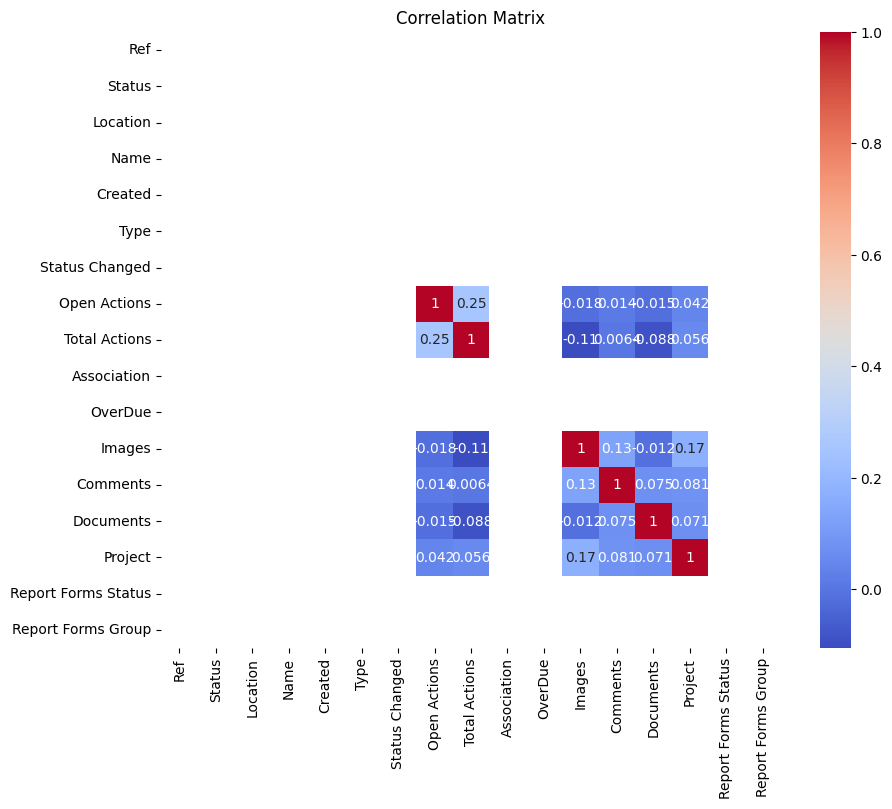

No numerical columns available for outlier detection.


<ipython-input-29-8d0cc8c7584d>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-29-8d0cc8c7584d>:50: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=data, x=col, palette='Set2')


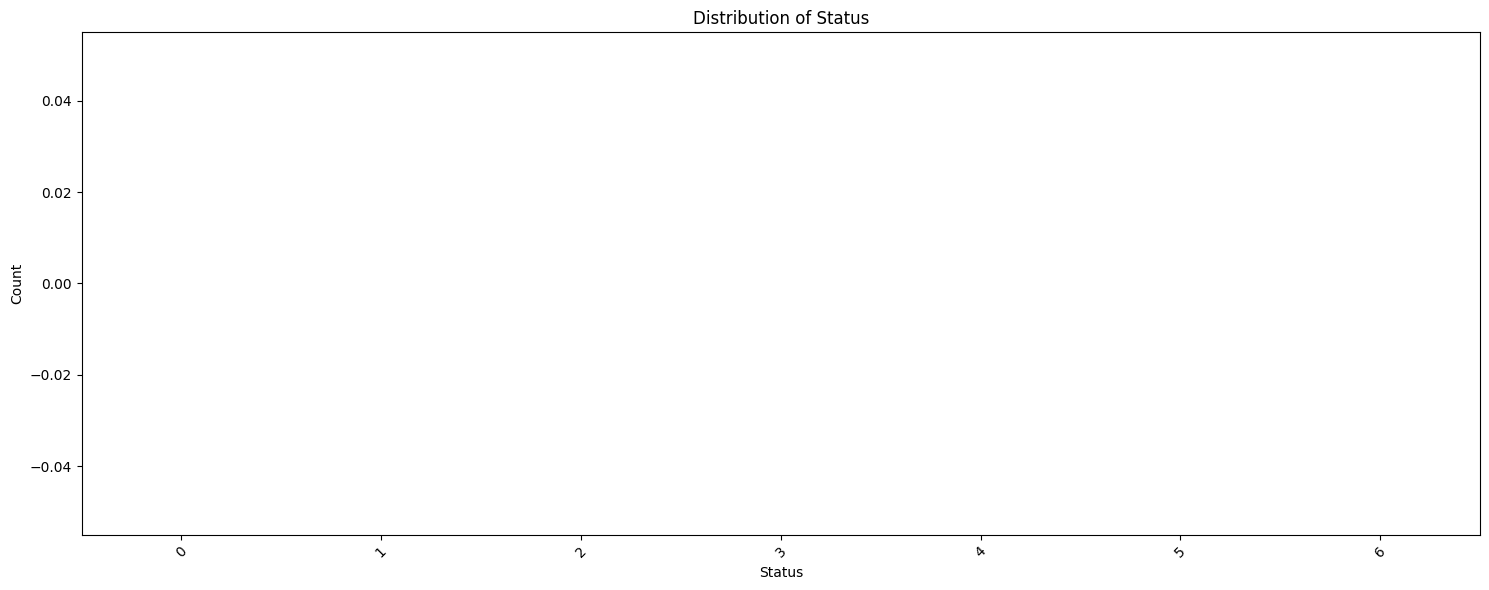

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix Analysis
# Convert relevant columns to numeric if they contain non-numeric values
for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Please check its contents.")

# Calculate the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Group by Project_ID and calculate average progress percentage (if applicable)
if 'Project_ID' in data.columns and 'Progress_Percentage' in data.columns:
    average_progress = data.groupby('Project_ID')['Progress_Percentage'].mean()
    print("\nAverage Progress Percentage by Project:")
    print(average_progress)

# Boxplot for Outlier Detection
numerical_columns = ['Delay_Days', 'Budget', 'Progress_Percentage']
available_columns = [col for col in numerical_columns if col in data.columns]

if available_columns:
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(available_columns, 1):
        plt.subplot(1, len(available_columns), i)
        sns.boxplot(y=data[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns available for outlier detection.")

# Count Plot for Categorical Data Distribution
categorical_columns = ['Project_Type', 'Milestone_Name', 'Status']  # Replace with actual column names
available_categorical_columns = [col for col in categorical_columns if col in data.columns]

if available_categorical_columns:
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(available_categorical_columns, 1):
        plt.subplot(1, len(available_categorical_columns), i)
        sns.countplot(data=data, x=col, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns available for distribution analysis.")

Correlation Matrix :
Identifies relationships between numerical features.
Helps you understand which variables are strongly correlated.
Boxplot for Outlier Detection :
Highlights extreme values in numerical columns like Delay_Days, Budget, or Progress_Percentage.
Useful for identifying potential anomalies.
Count Plot for Categorical Data :
Shows the frequency of categories in columns like Project_Type, Milestone_Name, or Status.
Helps you understand the distribution of categorical data.

In [ ]:
!pip install ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import cv2
import torch
import numpy as np
import IPython.display
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # For image display in Colab


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab.output import eval_js
from IPython.display import display, Javascript
import PIL.Image
import io
import base64

# JavaScript code to access the webcam
def take_photo(filename='photo.jpg'):
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            document.body.appendChild(div);
            const video = document.createElement('video');
            div.appendChild(video);
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);
            video.play();

            // Add button to capture image
            const button = document.createElement('button');
            button.textContent = 'Capture';
            div.appendChild(button);
            await new Promise((resolve) => button.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', 0.8);
        }
        takePhoto();
    ''')

    display(js)
    data = eval_js("takePhoto()")
    binary = base64.b64decode(data.split(',')[1])

    # Convert binary image data into PIL Image
    image = PIL.Image.open(io.BytesIO(binary))

    # Mirror the image (flip horizontally)
    mirrored_image = image.transpose(PIL.Image.FLIP_LEFT_RIGHT)

    # Save the mirrored image
    mirrored_image.save(filename)

    return filename

# Capture the image from webcam and apply mirroring
image_path = take_photo()
print(f"Mirrored image saved at: {image_path}")


<IPython.core.display.Javascript object>

Mirrored image saved at: photo.jpg



image 1/1 /content/photo.jpg: 480x640 3 persons, 2 chairs, 236.7ms
Speed: 3.8ms preprocess, 236.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


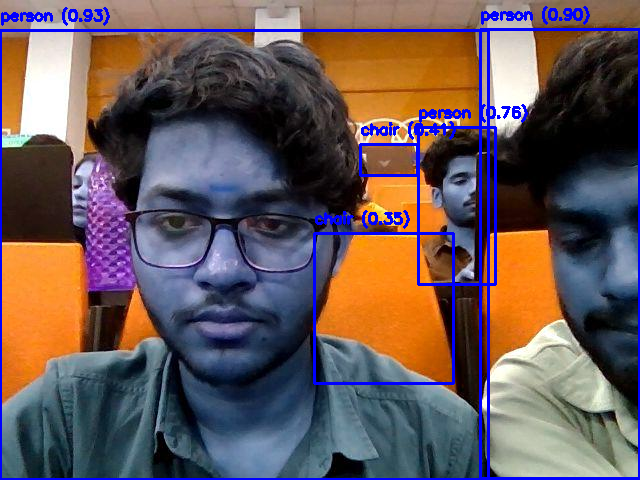

The persons are not wearing a helmet.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO # import the YOLO class


# Load a YOLO model
model = YOLO('yolov8n.pt')  # Load a pretrained model (e.g., yolov8n)

# Run detection on the captured image
results = model(image_path)

# Read and process the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

helmet_detected = False  # Flag to check for a helmet

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        cls = int(box.cls[0].item())  # Class ID

        # Define class names
        class_names = model.names
        label = f"{class_names[cls]} ({conf:.2f})"

        # Check if helmet is detected
        if "helmet" in label.lower():
            helmet_detected = True

        # Set color (Green for PPE, Red for missing PPE)
        color = (0, 255, 0) if "helmet" in label or "vest" in label else (255, 0, 0)

        # Draw bounding box and label
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image with bounding boxes
cv2_imshow(img)

# Check and print the result
if not helmet_detected:
    print("The person is not wearing a helmet.")
else:
    print("Helmet detected.")

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving construction_project_dataset.csv to construction_project_dataset.csv
Saving construction_project_performance_dataset.csv to construction_project_performance_dataset.csv


In [ ]:
import pandas as pd

# Sample dataset creation
data = {
    'task_id': [101, 102, 103, 104, 105],
    'actual_progress': [80, 50, 100, 60, 90],
    'labor_available': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'material_delivered': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'weather': ['Clear', 'Rainy', 'Clear', 'Cloudy', 'Rainy'],
    'rainy_days': [0, 3, 0, 1, 4],
    'expected_duration': [10, 15, 7, 12, 8],
    'actual_duration': [12, 18, 7, 14, 10],
    'delayed': ['Yes', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)
df.to_csv('construction_data.csv', index=False)
df.head()


,task_id,actual_progress,labor_available,material_delivered,weather,rainy_days,expected_duration,actual_duration,delayed
0,101,80,Yes,Yes,Clear,0,10,12,Yes
1,102,50,No,No,Rainy,3,15,18,Yes
2,103,100,Yes,Yes,Clear,0,7,7,No
3,104,60,Yes,No,Cloudy,1,12,14,Yes
4,105,90,No,Yes,Rainy,4,8,10,Yes


from matplotlib import pyplot as plt
_df_0['task_id'].plot(kind='hist', bins=20, title='task_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['actual_progress'].plot(kind='hist', bins=20, title='actual_progress')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rainy_days'].plot(kind='hist', bins=20, title='rainy_days')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['expected_duration'].plot(kind='hist', bins=20, title='expected_duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('labor_available').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('material_delivered').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('delayed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='task_id', y='actual_progress', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='actual_progress', y='rainy_days', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='rainy_days', y='expected_duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='expected_duration', y='actual_duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['task_id']
  ys = series['actual_progress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('task_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('labor_available')):
  _plot_series(series, series_name, i)
  fig.legend(title='labor_available', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('task_id')
_ = plt.ylabel('actual_progress')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['task_id']
  ys = series['actual_progress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('task_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('material_delivered')):
  _plot_series(series, series_name, i)
  fig.legend(title='material_delivered', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('task_id')
_ = plt.ylabel('actual_progress')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['task_id']
  ys = series['actual_progress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('task_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('task_id')
_ = plt.ylabel('actual_progress')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['task_id']
  ys = series['actual_progress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('task_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('delayed')):
  _plot_series(series, series_name, i)
  fig.legend(title='delayed', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('task_id')
_ = plt.ylabel('actual_progress')

from matplotlib import pyplot as plt
_df_16['task_id'].plot(kind='line', figsize=(8, 4), title='task_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['actual_progress'].plot(kind='line', figsize=(8, 4), title='actual_progress')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['rainy_days'].plot(kind='line', figsize=(8, 4), title='rainy_days')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['expected_duration'].plot(kind='line', figsize=(8, 4), title='expected_duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['material_delivered'].value_counts()
    for x_label, grp in _df_20.groupby('labor_available')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('labor_available')
_ = plt.ylabel('material_delivered')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['weather'].value_counts()
    for x_label, grp in _df_21.groupby('material_delivered')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('material_delivered')
_ = plt.ylabel('weather')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['delayed'].value_counts()
    for x_label, grp in _df_22.groupby('weather')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('weather')
_ = plt.ylabel('delayed')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['labor_available'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='task_id', y='labor_available', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['material_delivered'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='task_id', y='material_delivered', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='task_id', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['delayed'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='task_id', y='delayed', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd

df = pd.read_csv("construction_data.csv")
df.head()


,task_id,actual_progress,labor_available,material_delivered,weather,rainy_days,expected_duration,actual_duration,delayed
0,101,80,Yes,Yes,Clear,0,10,12,Yes
1,102,50,No,No,Rainy,3,15,18,Yes
2,103,100,Yes,Yes,Clear,0,7,7,No
3,104,60,Yes,No,Cloudy,1,12,14,Yes
4,105,90,No,Yes,Rainy,4,8,10,Yes


from matplotlib import pyplot as plt
_df_27['task_id'].plot(kind='hist', bins=20, title='task_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['actual_progress'].plot(kind='hist', bins=20, title='actual_progress')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['rainy_days'].plot(kind='hist', bins=20, title='rainy_days')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['expected_duration'].plot(kind='hist', bins=20, title='expected_duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('labor_available').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('material_delivered').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('delayed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='task_id', y='actual_progress', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='actual_progress', y='rainy_days', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='rainy_days', y='expected_duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='expected_duration', y='actual_duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['task_id']
  ys = series['actual_progress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('task_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('labor_available')):
  _plot_series(series, series_name, i)
  fig.legend(title='labor_available', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('task_id')
_ = plt.ylabel('actual_progress')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['task_id']
  ys = series['actual_progress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('task_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('material_delivered')):
  _plot_series(series, series_name, i)
  fig.legend(title='material_delivered', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('task_id')
_ = plt.ylabel('actual_progress')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['task_id']
  ys = series['actual_progress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('task_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('task_id')
_ = plt.ylabel('actual_progress')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['task_id']
  ys = series['actual_progress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('task_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('delayed')):
  _plot_series(series, series_name, i)
  fig.legend(title='delayed', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('task_id')
_ = plt.ylabel('actual_progress')

from matplotlib import pyplot as plt
_df_43['task_id'].plot(kind='line', figsize=(8, 4), title='task_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['actual_progress'].plot(kind='line', figsize=(8, 4), title='actual_progress')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['rainy_days'].plot(kind='line', figsize=(8, 4), title='rainy_days')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['expected_duration'].plot(kind='line', figsize=(8, 4), title='expected_duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['material_delivered'].value_counts()
    for x_label, grp in _df_47.groupby('labor_available')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('labor_available')
_ = plt.ylabel('material_delivered')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['weather'].value_counts()
    for x_label, grp in _df_48.groupby('material_delivered')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('material_delivered')
_ = plt.ylabel('weather')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['delayed'].value_counts()
    for x_label, grp in _df_49.groupby('weather')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('weather')
_ = plt.ylabel('delayed')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['labor_available'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='task_id', y='labor_available', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['material_delivered'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='task_id', y='material_delivered', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='task_id', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['delayed'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='task_id', y='delayed', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Convert Yes/No to 1/0
df['labor_available'] = df['labor_available'].map({'Yes': 1, 'No': 0})
df['material_delivered'] = df['material_delivered'].map({'Yes': 1, 'No': 0})
df['delayed'] = df['delayed'].map({'Yes': 1, 'No': 0})

# Convert weather to numeric category
df['weather'] = df['weather'].astype('category').cat.codes

df.head()


,task_id,actual_progress,labor_available,material_delivered,weather,rainy_days,expected_duration,actual_duration,delayed
0,101,80,1,1,0,0,10,12,1
1,102,50,0,0,2,3,15,18,1
2,103,100,1,1,0,0,7,7,0
3,104,60,1,0,1,1,12,14,1
4,105,90,0,1,2,4,8,10,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['actual_progress', 'labor_available', 'material_delivered', 'weather', 'rainy_days']]
y = df['delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



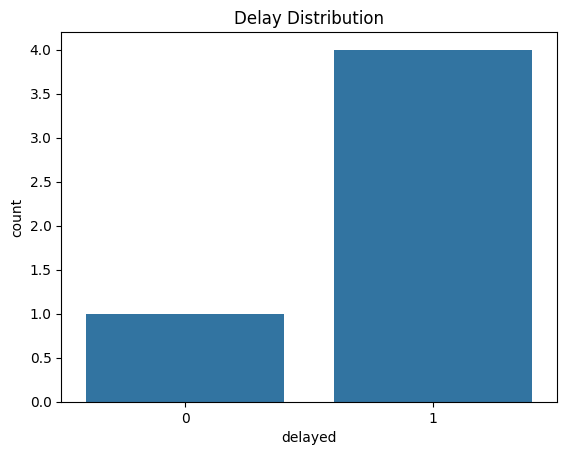

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='delayed', data=df)
plt.title("Delay Distribution")
plt.show()


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("construction_data.csv")

# Encode categorical columns
df['labor_available'] = df['labor_available'].map({'Yes': 1, 'No': 0})
df['material_delivered'] = df['material_delivered'].map({'Yes': 1, 'No': 0})
df['delayed'] = df['delayed'].map({'Yes': 1, 'No': 0})
df['weather'] = df['weather'].astype('category').cat.codes

# Features and labels
X = df[['actual_progress', 'labor_available', 'material_delivered', 'weather', 'rainy_days']].values
y = df['delayed'].values


In [ ]:
import numpy as np

# Reshape input to be 3D: (samples, height=5, width=1)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_test, y_test))


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2500 - loss: 1.0945 - val_accuracy: 0.0000e+00 - val_loss: 0.7394
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.7500 - loss: 0.7024 - val_accuracy: 1.0000 - val_loss: 0.4180
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.7500 - loss: 0.6851 - val_accuracy: 1.0000 - val_loss: 0.2819
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7500 - loss: 0.7734 - val_accuracy: 1.0000 - val_loss: 0.2374
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.7500 - loss: 0.8108 - val_accuracy: 1.0000 - val_loss: 0.2411
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.7500 - loss: 0.7872 - val_accuracy: 1.0000 - val_loss: 0.2758
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7500 - loss: 0.7272 - val_accuracy: 1.0000 - val_loss: 0.3370
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.7500 - loss: 0.6614 - val_accuracy: 1.0000 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0851
Test Accuracy: 1.0


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


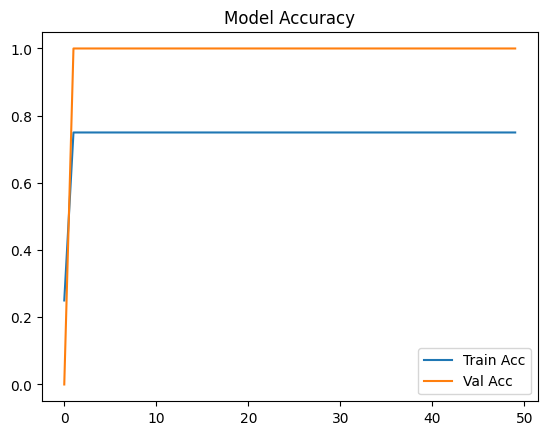

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()
